# Avocado Project

## Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.


## Attribute Information

•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold


## Requirement

The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
df_avocado=pd.read_csv("C:\data science\Evaluation Project\csv files\\avocado.csv")
pd.options.display.max_columns = 14
df_avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Starting the EDA

In [3]:
# Checking Configuration of Dataset
df_avocado.shape

(18249, 14)

Obs- 
* We can see its a huge dataset with 18,249 rows
* And there are 14 columns of which 13 are input, and the output will be either Unit Price(For Regression Model), and Region(For Classification Model)

In [4]:
# Checking data types of attributes
df_avocado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Obs- We can see the columns 'Date','Type','Region' are object type, while all other are Continuous type

The column 'Unnamed' is just an index column and is not required for any prediction, so will be deleting it

In [5]:
# Checking for null values if any
df_avocado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Obs- There are no null values in the dataset

In [6]:
# Checking for white spaces
df_avocado.loc[0:]==" "

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Obs- There is no white space in the data

In [7]:
#Check for duplicate data
df_avocado.duplicated().sum()

0

Obs- There is no duplicate data in the dataset

In [8]:
df_avocado.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

Obs- The dataset contain two types of Avacodas which are collected in span of 4 years from 54 regions

## Feature Engineering

### Deleting Unwanted Column

In [9]:
df_avocado.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
df_avocado.shape

(18249, 13)

### Inserting Total Sales Column (Total  Volume * Average Price)

In [11]:
df_avocado['Total Sales']=df_avocado['AveragePrice']*df_avocado['Total Volume']

Obs- We can see Total Sales column has been added

### Extracting Date and Month from Date Column 


In [12]:
df_avocado['Date'] = pd.to_datetime(df_avocado['Date'])     # changing the object type to datetime type
df_avocado['Day'] = df_avocado['Date'].apply(lambda d:d.day)# Extracting the date and adding to df
df_avocado['Month'] = df_avocado['Date'].apply(lambda m:m.month)#Extracting month and adding to df

### Deleting Date Column, as information is extracted from it

In [13]:
df_avocado.drop(columns = ['Date'],inplace = True)

In [14]:
df_avocado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,...,XLarge Bags,type,year,region,Total Sales,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,...,0.0,conventional,2015,Albany,85434.7046,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,...,0.0,conventional,2015,Albany,74083.9230,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,...,0.0,conventional,2015,Albany,109944.8046,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,...,0.0,conventional,2015,Albany,85311.5220,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,...,0.0,conventional,2015,Albany,65330.6880,29,11


### Renaming column names into meaningful names

In [15]:
df_avocado = df_avocado.rename(columns={'4046':'PLU_4046','4225':'PLU_4225','4770':'PLU_4770'})
df_avocado.head()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,...,XLarge Bags,type,year,region,Total Sales,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,...,0.0,conventional,2015,Albany,85434.7046,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,...,0.0,conventional,2015,Albany,74083.9230,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,...,0.0,conventional,2015,Albany,109944.8046,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,...,0.0,conventional,2015,Albany,85311.5220,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,...,0.0,conventional,2015,Albany,65330.6880,29,11


In [16]:
#Checking description of dataset
df_avocado.describe()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Total Sales,Day,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,9.279484e+05,15.662612,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.686048e+06,8.776281,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.344504e+02,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,1.716418e+04,8.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,1.395298e+05,16.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,5.141914e+05,23.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,5.437991e+07,31.000000,12.000000


<AxesSubplot:>

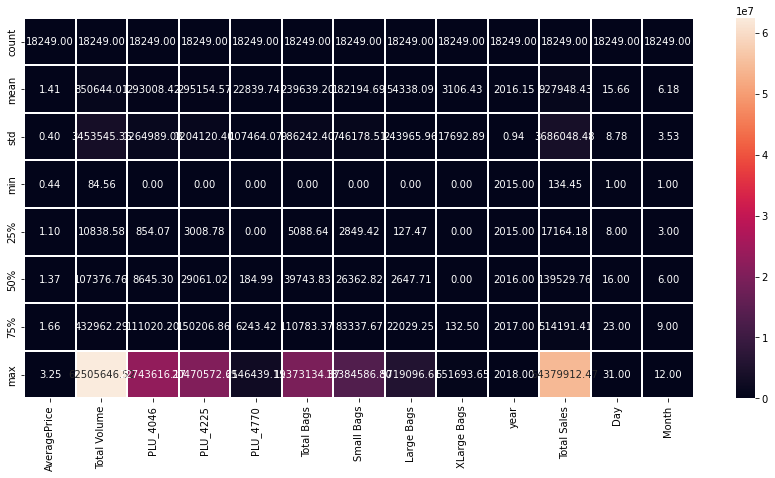

In [17]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(15,7))
sns.heatmap(df_avocado.describe(),linewidths = 0.1,fmt='0.2f',annot = True)

Obs-
* We can see mean in columns 'AveragePrice','Total Volume','4225','4770'.'Large Bags','Xlarge Bags' is higher than median, and therefore we can say data is right skewed.
* We can see mean in columns '4046','Total Bags','Small Bags' is smaller than median, and thus data in these columns is left skewed
* Also we can observe max of columns 'AvaeragePrice','TotalVolume','4770','TotalBags','SmallBags','LargeBags','XlargeBags' is exceptionally high than 75%, so we can say outliers are present in these columns

## Visualization

### Univariate Analysis

conventional    9126
organic         9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

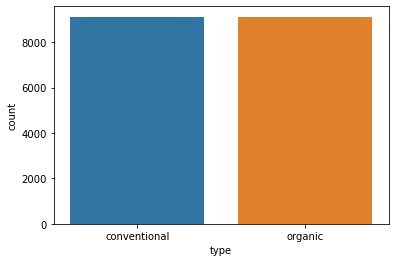

In [18]:
# Count plot to check individual value counts of type of Avocado
print(df_avocado['type'].value_counts())

sns.countplot(df_avocado['type'])

Obs- We can see that both Conventional and Organic Avocados are sold in almost equal proportions

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


<AxesSubplot:xlabel='year', ylabel='count'>

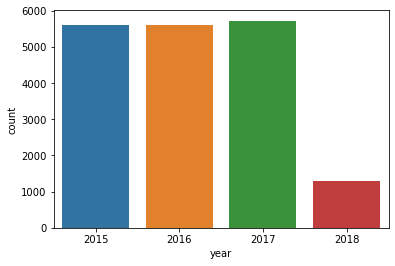

In [19]:
# Count plot to check individual value counts of year wise sale of Avocado
print(df_avocado['year'].value_counts())

sns.countplot(df_avocado['year'])

Obs- The Maximum number of avocaods are sold in year 2017, and nearly same in years 2015-16 and the least in year 2018

In [20]:
# Count plot to check individual value counts of records entered from all Regions
print(df_avocado['region'].value_counts())

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

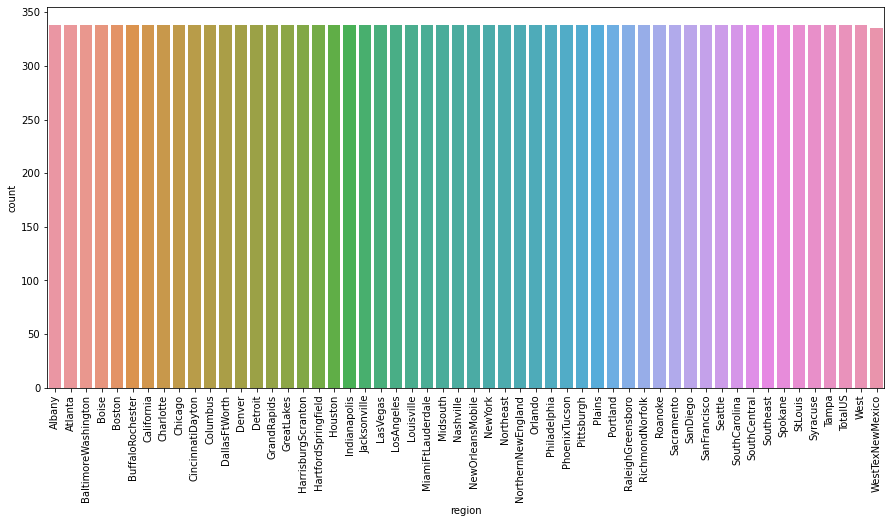

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(df_avocado['region'])
plt.xticks(rotation=90)
plt.show()

Obs- We can see the equal number of records from all the regions

<AxesSubplot:xlabel='AveragePrice'>

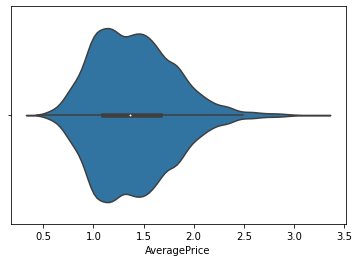

In [22]:
# Violin plot to check distribution of AveragePrice of Avocado
sns.violinplot(df_avocado['AveragePrice'])

Obs- We can see average price of most samples is distributed in range of 1.0-1.5,very few of them are sold at cheaper rates than that, and few others that have higher rate than that

In [23]:
# Distribution plot to check skewness in the features

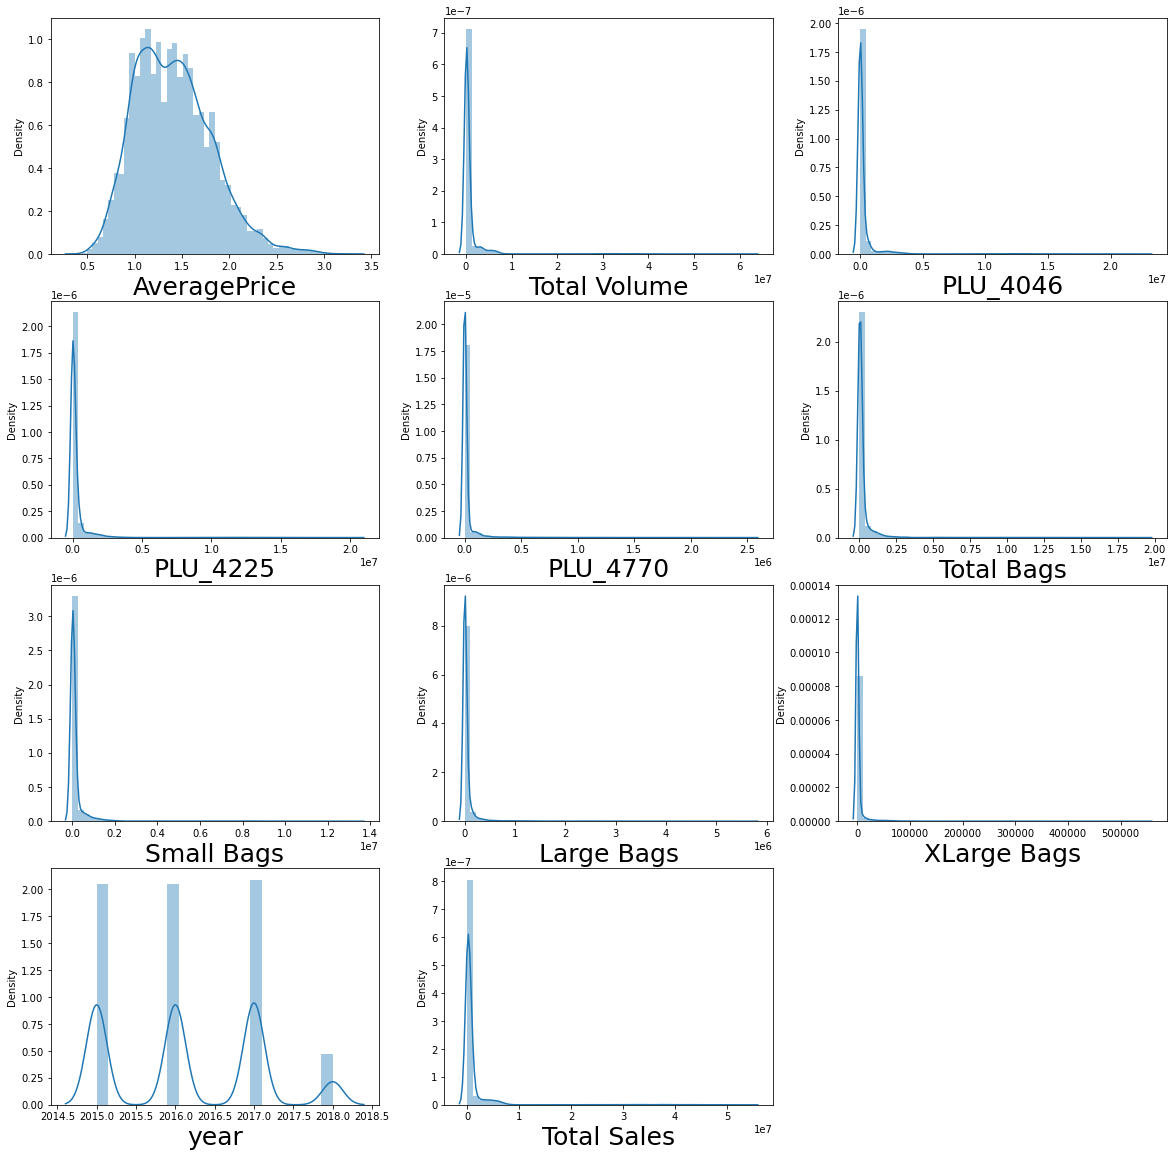

In [24]:
plt.figure(figsize=(20,20))
plotnumber=1

col=['AveragePrice','Total Volume', 'PLU_4046', 'PLU_4225','PLU_4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Total Sales']
     
for column in col:
    if plotnumber<=11: #as there are 11 continuous columns 
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df_avocado[column])
        plt.xlabel(column,fontsize=25)
    plotnumber +=1
plt.show()

Obs- We can see skewness in all the columns.

In [25]:
#box plot to check outliers

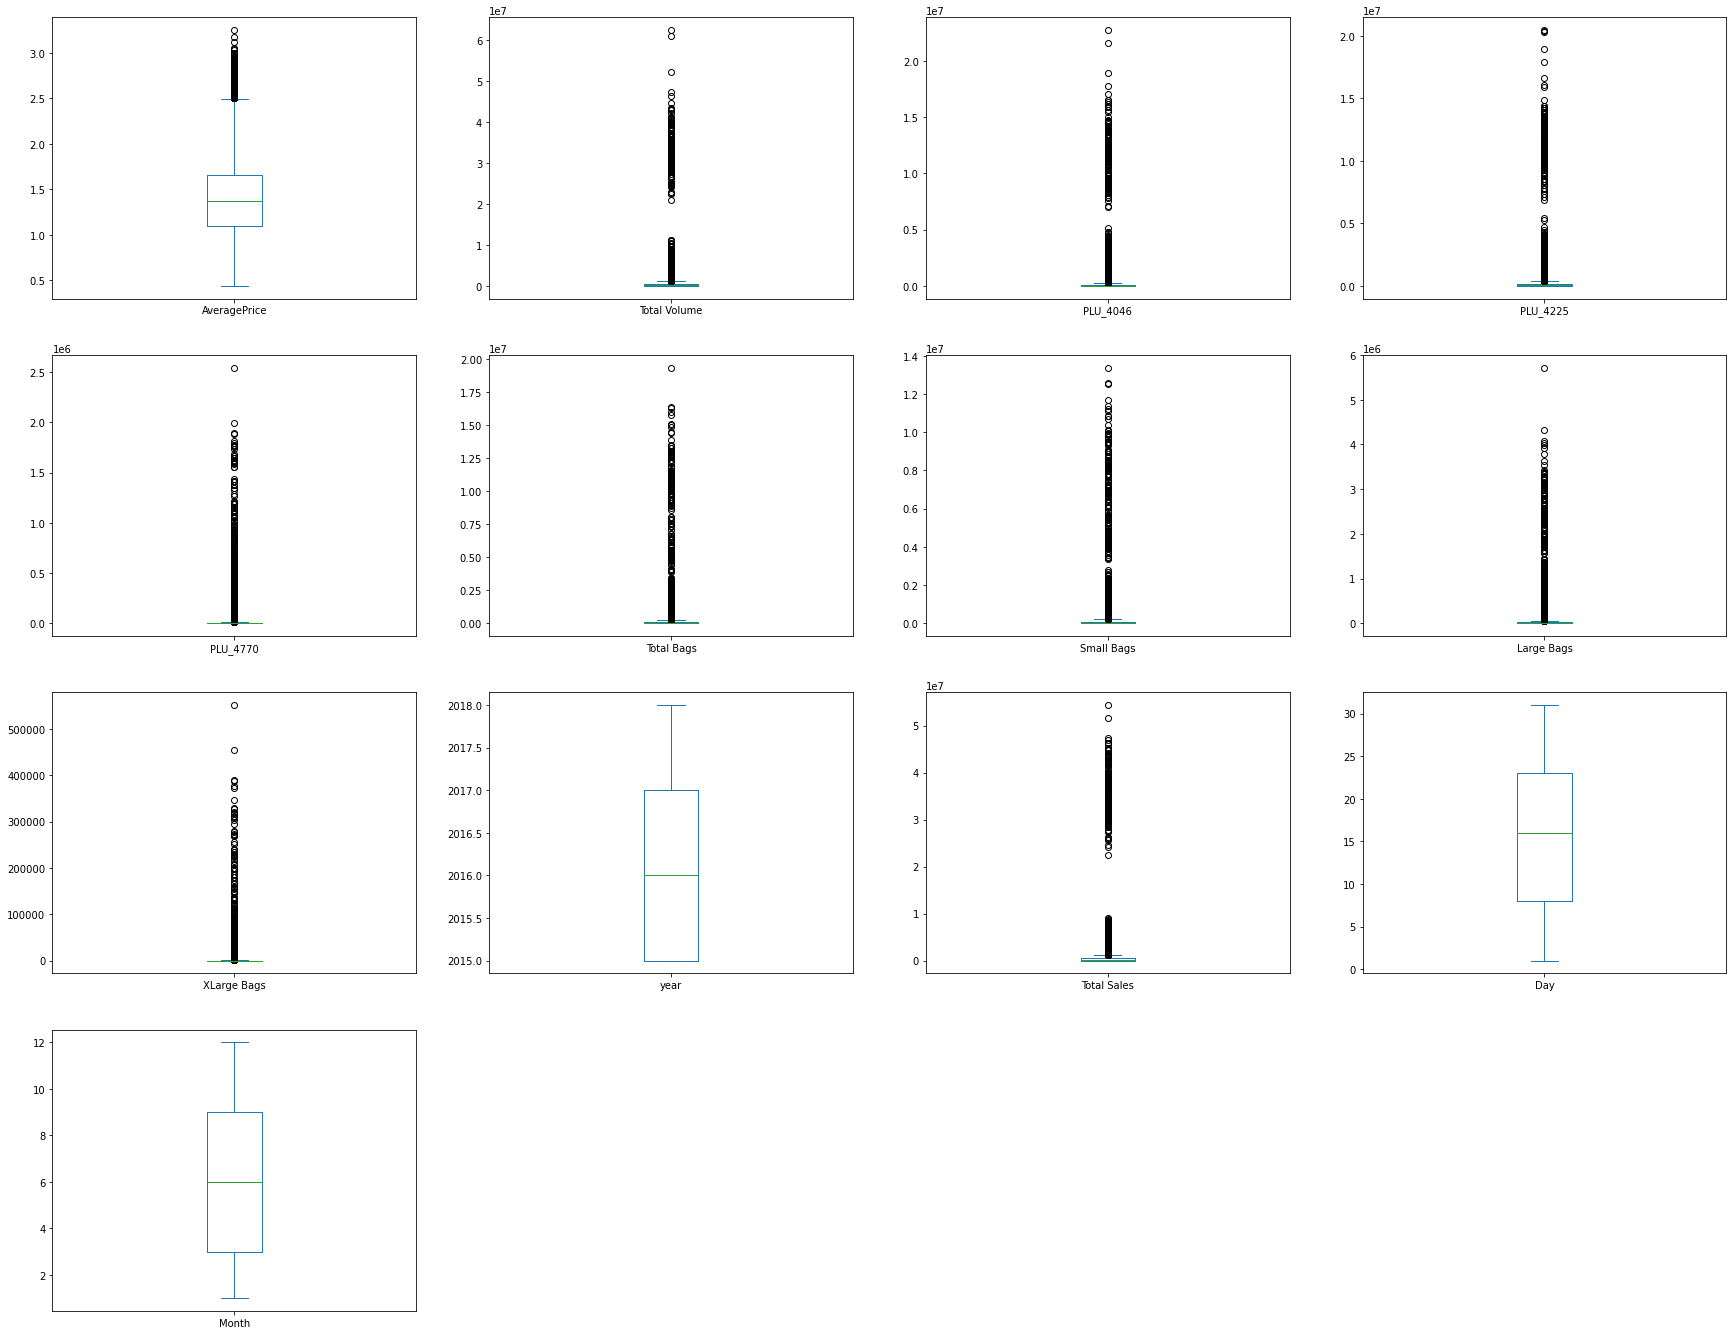

In [26]:
df_avocado.plot(kind='box',subplots=True,layout=(5,4),figsize=(30,30))
plt.show()

Obs- We can see except for year column, outliers are present in all the columns

### Bivariate and Multivariate Visualization

<AxesSubplot:xlabel='year', ylabel='count'>

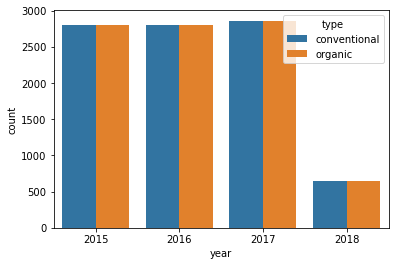

In [27]:
# Count plot to check year-wise value counts of type of Avocado
sns.countplot(x="year", data=df_avocado,hue="type")

Obs- We can see equal number of avocados are sold in all the years too

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

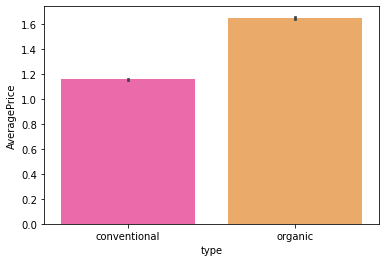

In [28]:
# Plot to check Average Price difference between type of Avocados
sns.barplot(x="type", data=df_avocado,y="AveragePrice",palette='spring')

Obs- We can see theAveragePrice of Organic is comparitively higher than Conventional Avocados 

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

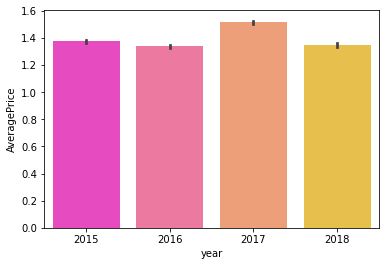

In [29]:
# Plot to check Average Price difference between sale-year of Avocados
sns.barplot(x="year", data=df_avocado,y="AveragePrice",palette='spring')

Obs- We can see Average Price of Avocados was highest in year 2017(The sale was also highest in this year) and almost similar in the other 3 years

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

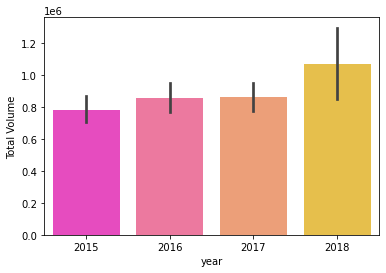

In [30]:
# Plot to check Average Price difference between sale-year of Avocados
sns.barplot(x="year", data=df_avocado,y="Total Volume",palette='spring')

Obs- We can see the total volumes of Avocados is maximum in the year 2018, followed by 2016 & 2017 in the same league and teh least in year 2015

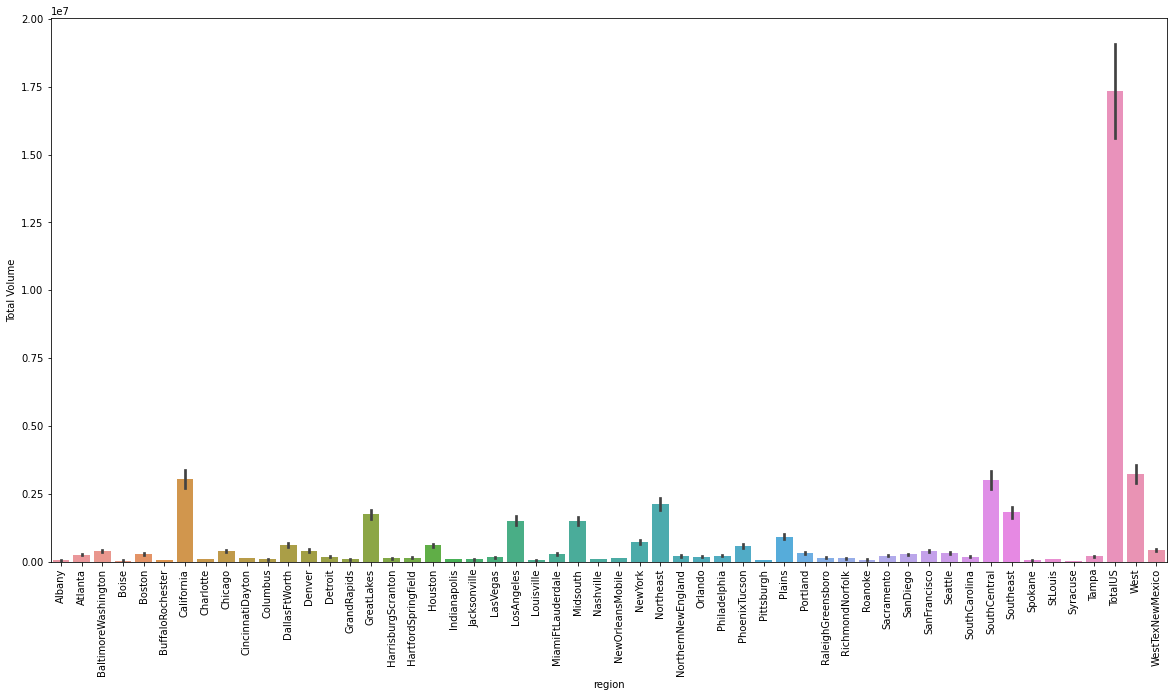

In [31]:
# Plot to check Region-wise Total Volume 
plt.figure(figsize=(20,10))
sns.barplot(x="region", data=df_avocado,y="Total Volume")
plt.xticks(rotation=90)
plt.show()

Obs- We can see that the maximum volume of Avocados are sold from 'TotalUS', followed by 'West','California','Northeast' and the least from 'Syracuse'and 'Boise'

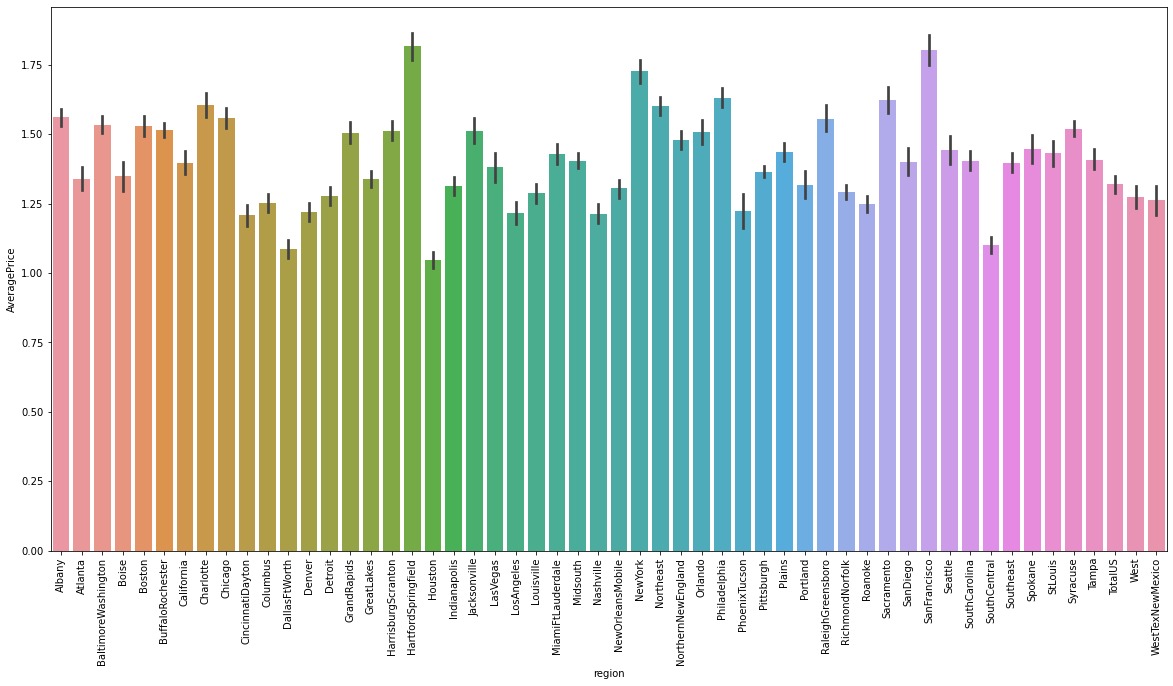

In [32]:
# Plot to check Region-wise Average Price
plt.figure(figsize=(20,10))
sns.barplot(x="region", data=df_avocado,y="AveragePrice")
plt.xticks(rotation=90)
plt.show()

Obs- We can observe that teh avocados from regions 'HattfordSpringField','Seattle' are sold at average price above 1.75, while the one's from NorthEast are sold at price 1.75 and from all other regions at a rate below 1.75. The cheapest avocados are from region 'Houston'


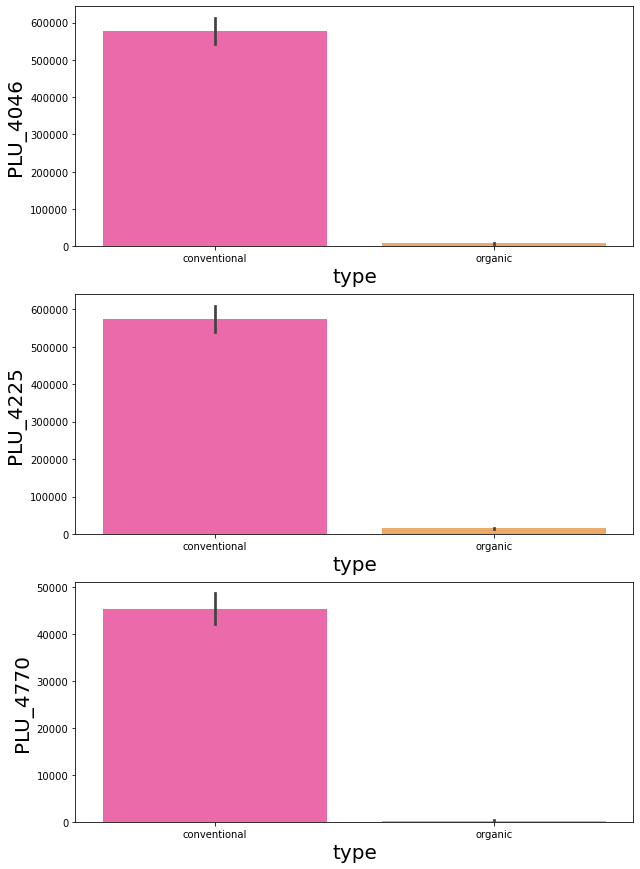

In [33]:
# Plots to check Product Look Up codes for type of Avocados
y_cols = df_avocado[['PLU_4046','PLU_4225','PLU_4770']]
x_cols = df_avocado['type']
plt.figure(figsize=(10,15),facecolor='white')
plotnum = 1
for cols in y_cols:
    plt.subplot(3,1,plotnum)
    sns.barplot(x_cols,y_cols[cols], palette='spring')
    plt.xlabel('type',fontsize=20)
    plt.ylabel(cols,fontsize=20)
    plotnum+=1
plt.show()

Obs- 
* We can see PLU's for Conventional type is extensively higher than Organic type.
* We can say thus predict less production high demand  for the organic rates as there average-price is also higher

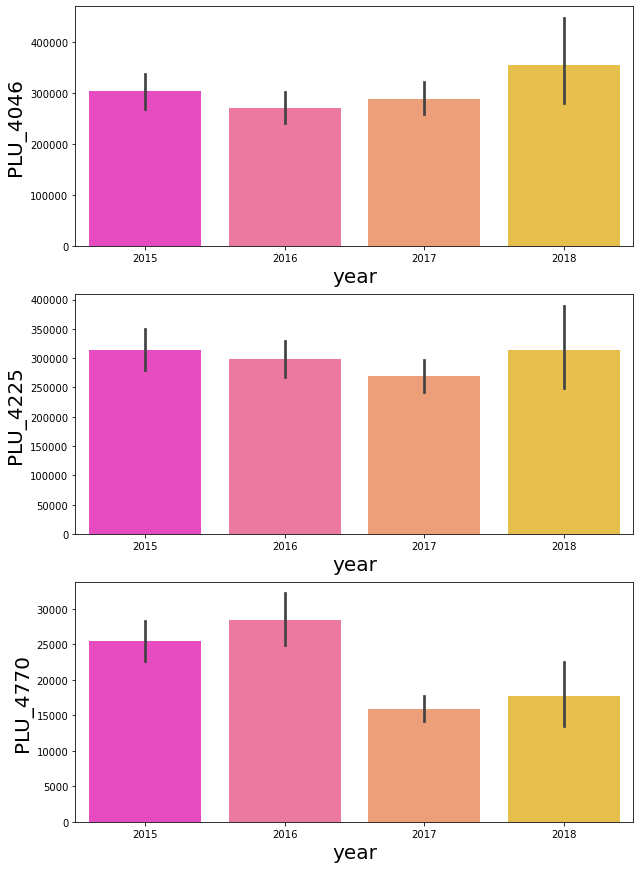

In [34]:
# Similarly, Plots to check Product Look Up codes for Year-of-sale of Avocados
y_cols = df_avocado[['PLU_4046','PLU_4225','PLU_4770']]
x_cols = df_avocado['year']
plt.figure(figsize=(10,15),facecolor='white')
plotnum = 1
for cols in y_cols:
    plt.subplot(3,1,plotnum)
    sns.barplot(x_cols,y_cols[cols], palette='spring')
    plt.xlabel('year',fontsize=20)
    plt.ylabel(cols,fontsize=20)
    plotnum+=1
plt.show()

Obs- 
* For PLU_4046, year 2018 has the maximum entry and year 2016 has the least entry
* For PLU_4225, year 2015 & 2018 has the maximum entry and year 2017 has the least entry
* For PLU_4770, year 2016 has the maximum entry and year 2017 has the least entry

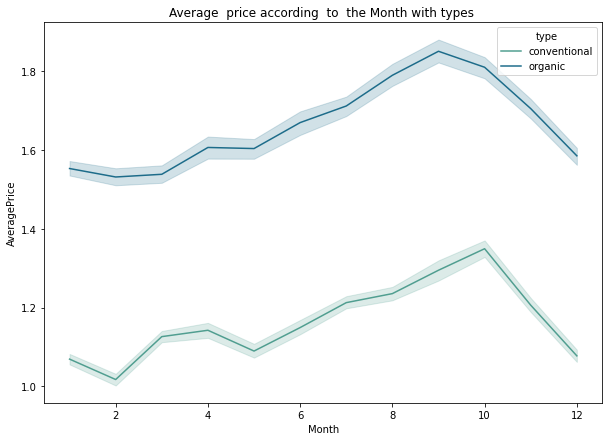

In [35]:
# Plotting Average Price according to Month and type
plt.figure(figsize=(10,7),facecolor='white')
sns.lineplot(x='Month',y='AveragePrice', hue = 'type',data=df_avocado, palette='crest')
plt.title('Average  price according  to  the Month with types ')
plt.show()

Obs- We can see the average price of both Conventional and Organic Avocados goes at peak in months 9-10(ie. Sepetember & October)

## Encoding Categorical Data

In [36]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df_avocado['type']=le.fit_transform(df_avocado['type'])
df_avocado['region']=le.fit_transform(df_avocado['region'])
df_avocado.head()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,...,XLarge Bags,type,year,region,Total Sales,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,...,0.0,0,2015,0,85434.7046,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,...,0.0,0,2015,0,74083.9230,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,...,0.0,0,2015,0,109944.8046,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,...,0.0,0,2015,0,85311.5220,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,...,0.0,0,2015,0,65330.6880,29,11


Obs- We can see both the columns have been encoded

## Checking Correlation 

In [37]:
df_avocado.corr()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,...,XLarge Bags,type,year,region,Total Sales,Day,Month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,...,-0.117592,0.615845,0.093197,-0.011716,-0.163061,0.027386,0.162409
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,...,0.747157,-0.232434,0.017193,0.174176,0.985910,-0.009747,-0.024689
PLU_4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,...,0.699377,-0.225819,0.003353,0.192073,0.957664,-0.010159,-0.025803
PLU_4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,...,0.688809,-0.232289,-0.009559,0.145726,0.959448,-0.012393,-0.022108
PLU_4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,...,0.679861,-0.210027,-0.036531,0.095252,0.832975,-0.009009,-0.033424
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,...,0.804233,-0.217788,0.071552,0.175256,0.961877,-0.004988,-0.022724
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,...,0.806845,-0.220535,0.063915,0.164702,0.966115,-0.003870,-0.023126
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,...,0.710858,-0.193177,0.087891,0.198768,0.877654,-0.008352,-0.020187
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,...,1.000000,-0.175483,0.081033,0.082281,0.770487,0.000319,-0.012969
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,...,-0.175483,1.000000,-0.000032,-0.000280,-0.231475,-0.000013,-0.000085


<AxesSubplot:>

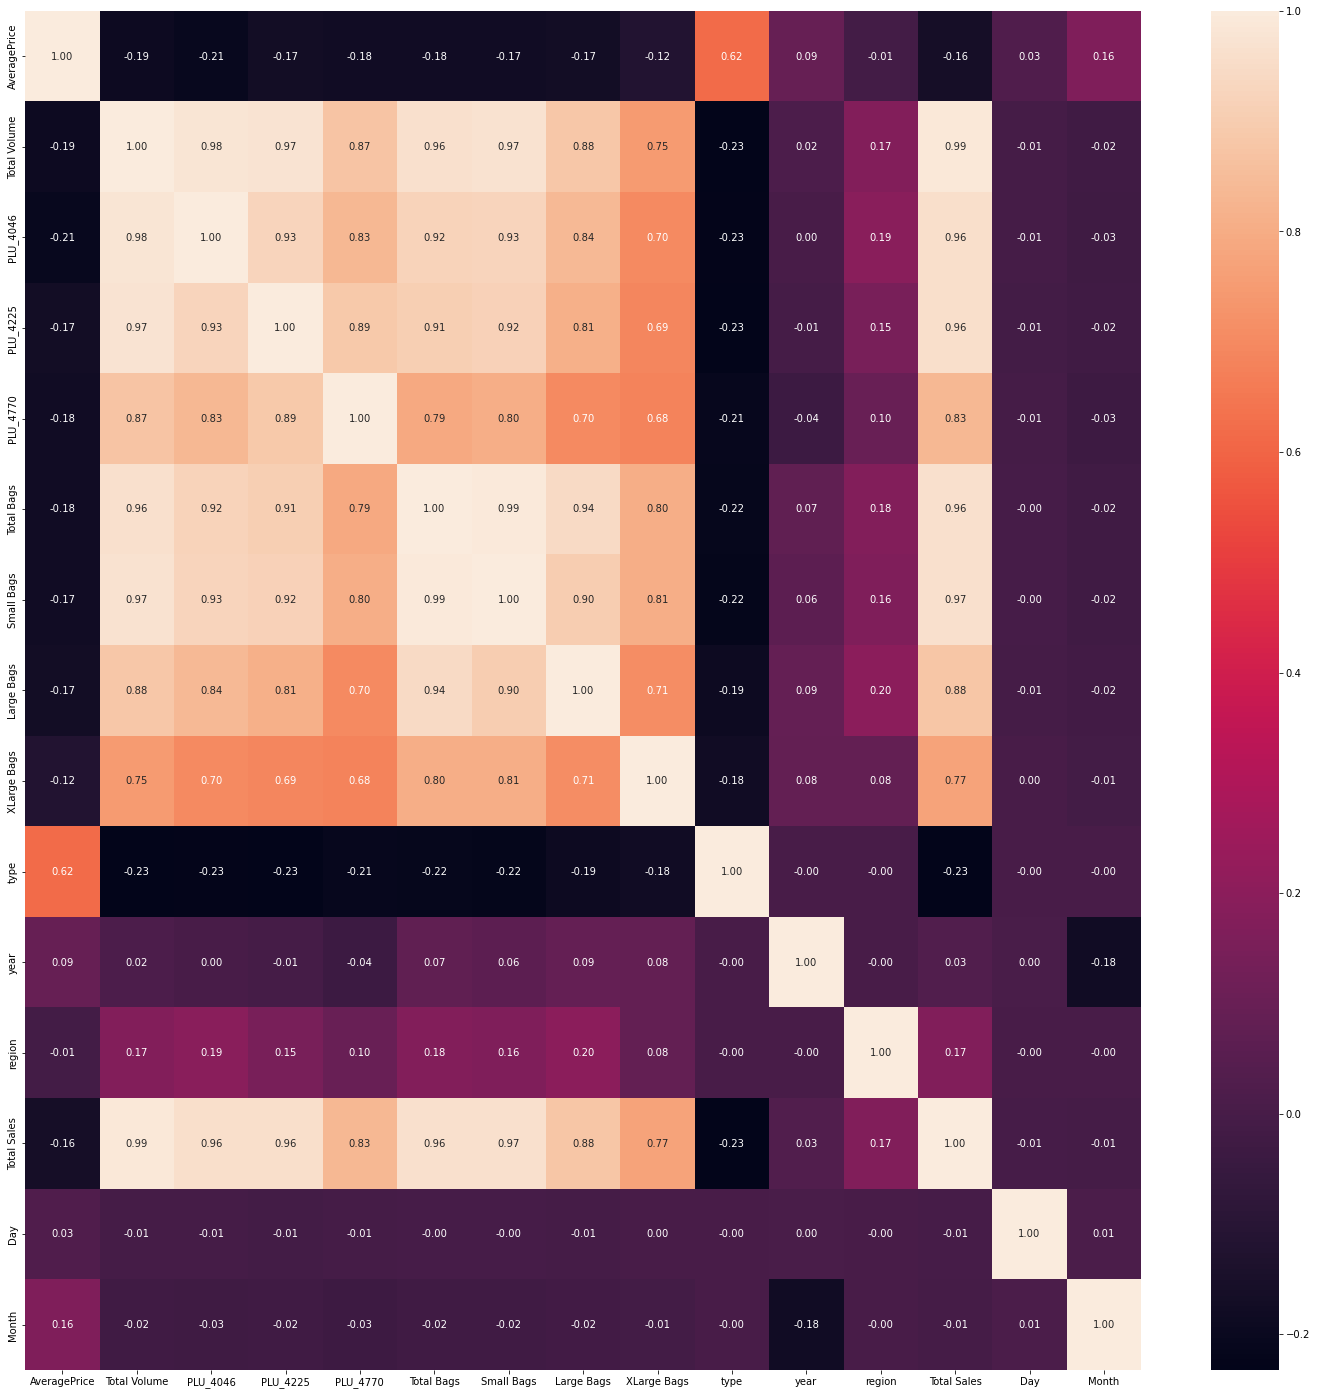

In [38]:
# Correlation using heatmap
plt.figure(figsize=(25,25))
sns.heatmap(df_avocado.corr(),annot=True,fmt='0.2f')

Obs- We can see there is strong positive corelation between columns:['Total Volume' and 'PLU_4046', 'PLU_4225', 'PLU_4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','Total Sales'] and thus we can say multi-collineaerity is present in multiple columns.
       
    * We will be deleting columns SmallBags,LargeBags,XLBags as they are highly co-related plus Total Bags is combination of these three

In [39]:
un_col=['Small Bags','Large Bags','XLarge Bags']
df_avocado.drop(un_col,axis=1,inplace=True)

In [40]:
df_avocado.shape

(18249, 12)

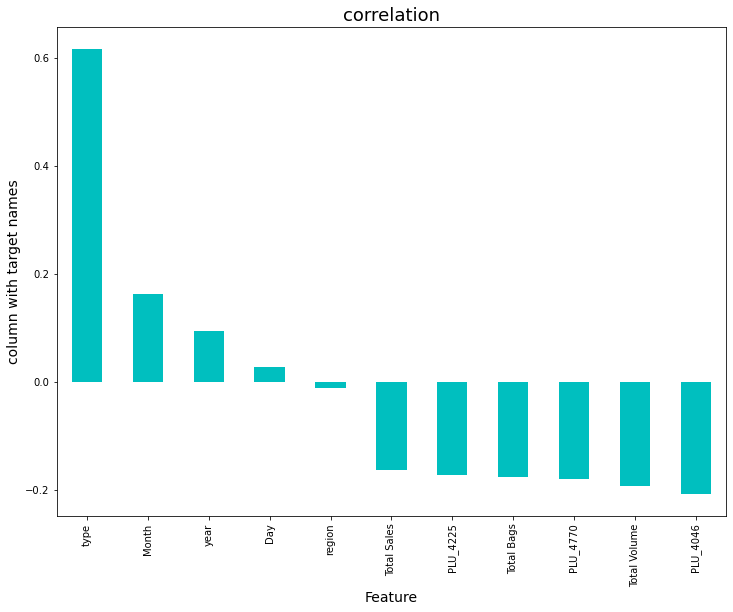

In [41]:
# Correlation of features with Target Column
plt.figure(figsize=(12,9))
df_avocado.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Obs- Only Type has positive correlation with target columns

## Detecting Outliers and Treating them

In [42]:
#Method 1: Z-Score
from scipy.stats import zscore
z=np.abs(zscore(df_avocado))
threshold=3
print(np.where(z>3))

(array([  346,   359,   783, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 4, ..., 0, 0, 0], dtype=int64))


In [43]:
df_avocado_new=df_avocado[(z<3).all(axis=1)]

In [44]:
print("df_avocado.shape:",df_avocado.shape, "\ndf_avocado_new.shape:",df_avocado_new.shape)

df_avocado.shape: (18249, 12) 
df_avocado_new.shape: (17823, 12)


In [45]:
# Checking data loss
data_loss=(18249-17651)/18249*100
data_loss

3.276891884486821

In [46]:
# Method 2: IQR(Inter Quartile) Method
Q1=df_avocado.quantile(0.25)
Q3=df_avocado.quantile(0.75)
IQR=Q3 - Q1

df_avocado_new2=df_avocado[~((df_avocado < (Q1 - 1.5 * IQR)) |(df_avocado > (Q3 + 1.5 * IQR))).any(axis=1)]

In [47]:
print("df_avocado.shape:",df_avocado.shape, "\ndf_avocado_new2.shape:",df_avocado_new2.shape)

df_avocado.shape: (18249, 12) 
df_avocado_new2.shape: (13330, 12)


In [48]:
# Checking data loss
data_loss2=(18249-11538)/18249*100
data_loss2

36.774617787276014

Obs- The Data Loss in IQR method is very high, so we will be going with Z-score method

In [49]:
# Reassigning obtained value to original dataframe
df_avocado=df_avocado_new
df_avocado.shape

(17823, 12)

## (Approach 1: 'Classification Model to find Region )

## Data Preprocessing

##  Seperating Input and Target variables

In [121]:
x=df_avocado.drop(columns='region')
y=df_avocado['region']

In [122]:
x.shape

(17823, 11)

In [123]:
y.shape

(17823,)

In [ ]:
y1.shape

## Data Transformation to treat Skewness

### Checking Skewness

In [124]:
x.skew()

AveragePrice    0.384974
Total Volume    3.638205
PLU_4046        4.450558
PLU_4225        4.128335
PLU_4770        4.792655
Total Bags      4.330215
type           -0.018069
year            0.221932
Total Sales     3.423213
Day             0.012347
Month           0.111072
dtype: float64

obs- keeping the acceptable range +/- 0.5, we can see skewness is present in columns 'Total Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'Total Bags','Total Sales'

Applying transformation method to treat the skewness

### Applying Transformation Method

In [125]:
x=pd.DataFrame(x)
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer() 
skew_col = ['Total Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'Total Bags','Total Sales']
x[skew_col]= pt.fit_transform(x[skew_col].values)

In [126]:
x.skew()

AveragePrice    0.384974
Total Volume   -0.005321
PLU_4046       -0.037545
PLU_4225       -0.044071
PLU_4770        0.021688
Total Bags     -0.017007
type           -0.018069
year            0.221932
Total Sales    -0.004361
Day             0.012347
Month           0.111072
dtype: float64

Obs- We can see the Skewness has gone from all those columns that contained it

## Data Scaling

In [127]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_scale=st.fit_transform(x)
x_scale=pd.DataFrame(x_scale)

In [131]:
x=pd.DataFrame(data=x_scale)

## Checking Multi-Collinearity

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [132]:
def vif_cal():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

vif_cal()

     VIF Factor  Features
0     31.307921         0
1   1932.223809         1
2      6.855657         2
3     11.950291         3
4      3.967635         4
5     14.764491         5
6      3.764348         6
7      1.464201         7
8   1614.740597         8
9      1.003963         9
10     1.132582        10


* (Feature Denoted as: 0: AveragePrice 1:Total Volume, 2:PLU_4046, 3:PLU_4225 , 4:PLU_4770, 5:Total Bags, 6:type, 7:year,  8:Total Sales, 9:Day, 10:Month ) 


* Keeping the acceptable range as below or equal 10, we observe the VIF of 'AveragePrice', 'Total Volume', 'PLU_4225','Total Bags', 'Total Sales' is high
* Deleting the column 'Total Sales' as it has max VIF and it infact was derived from Total Volume only.
* We will not be deleting Small Bags because Total Bags is combination of Small, Large and Xl bags, and if we delete 1, we will have to delete other 3 as well

In [133]:
x.drop(8, axis =1, inplace=True) # Dropping 'Total Sales' column

In [134]:
x.shape

(17823, 10)

## Data Modelling(Classification Model)

In [ ]:
#Finding Best Random State

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train, y_train)
    predc = dtc.predict(x_test)
    acc=accuracy_score(y_test, predc)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.764540864035908  on Random_state  105


### Splitting data into Train-Test

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=105)

In [137]:
x_train.shape

(12476, 10)

In [138]:
y_train.shape

(12476,)

In [139]:
x_test.shape

(5347, 10)

In [140]:
y_test.shape

(5347,)

## Using various Machine Learning Algorithms

In [142]:
#importing necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### 1. MultinomialNB
(Didn't work on it as scaled values were having some negative values)

### 2.Decision Tree Classifier

In [144]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,preddtc))
print("Confusion Matrix:\n",confusion_matrix(y_test,preddtc))
print("Classification Report:\n",classification_report(y_test,preddtc))

Accuracy: 0.7583691789788667
Confusion Matrix:
 [[72  0  0 ...  0  0  0]
 [ 0 67  0 ...  0  0  1]
 [ 0  0 73 ...  0  0  0]
 ...
 [ 0  0  0 ... 53  0  0]
 [ 0  0  0 ...  0 97  0]
 [ 0  1  0 ...  0  0 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.73       102
           1       0.66      0.64      0.65       104
           2       0.82      0.74      0.78        98
           3       0.87      0.70      0.78       104
           4       0.81      0.90      0.85        98
           5       0.74      0.69      0.71       102
           6       0.94      0.88      0.91        91
           7       0.77      0.81      0.79        97
           8       0.92      0.93      0.93       105
           9       0.79      0.79      0.79       103
          10       0.64      0.57      0.61       122
          11       0.74      0.78      0.76        93
          12       0.75      0.72      0.73       109
          13   

Obs- The Decision Tree Classifier has provided the accuracy-score: 0.7583691789788667 

### 3.K Nearest Neighbor Classifier

In [145]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predknn))
print("Confusion Matrix:\n",confusion_matrix(y_test,predknn))
print("Classification Report:\n",classification_report(y_test,predknn))

Accuracy: 0.4942958668412194
Confusion Matrix:
 [[67  0  0 ...  0  0  0]
 [ 0 48  0 ...  0  0  1]
 [ 0  0 76 ...  0  0  0]
 ...
 [ 0  0  0 ... 55  0  0]
 [ 0  0  0 ...  2 58  0]
 [ 0 13  1 ...  0  0 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.66      0.53       102
           1       0.26      0.46      0.33       104
           2       0.51      0.78      0.61        98
           3       0.59      0.64      0.62       104
           4       0.50      0.70      0.59        98
           5       0.49      0.49      0.49       102
           6       0.50      0.66      0.57        91
           7       0.26      0.43      0.32        97
           8       0.76      0.73      0.75       105
           9       0.34      0.56      0.42       103
          10       0.25      0.31      0.28       122
          11       0.37      0.70      0.48        93
          12       0.57      0.61      0.59       109
          13   

Obs- The K Nearest Neighbor Classifier has provided the accuracy-score: 0.4942958668412194

### 5.Support Vector Machine Classifier

In [146]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predsvc))
print("Confusion Matrix:\n",confusion_matrix(y_test,predsvc))
print("Classification Report:\n",classification_report(y_test,predsvc))

Accuracy: 0.699083598279409
Confusion Matrix:
 [[81  0  0 ...  0  0  0]
 [ 0 48  0 ...  0  0  0]
 [ 0  0 89 ...  0  0  0]
 ...
 [ 0  0  0 ... 55  0  0]
 [ 0  0  0 ...  0 79  0]
 [ 0  9  2 ...  0  0 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       102
           1       0.45      0.46      0.45       104
           2       0.88      0.91      0.89        98
           3       0.82      0.62      0.71       104
           4       0.83      0.82      0.82        98
           5       0.84      0.63      0.72       102
           6       0.75      0.87      0.81        91
           7       0.50      0.59      0.54        97
           8       0.95      0.96      0.96       105
           9       0.54      0.83      0.66       103
          10       0.51      0.48      0.50       122
          11       0.55      0.75      0.63        93
          12       0.75      0.82      0.78       109
          13    

Obs- The Support Vector Machine Classifier has provided the accuracy-score:0.699083598279409

### 5. Ensemble Methods

#### 5.1 Random Forest Classifier

In [147]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predrf))
print("Confusion Matrix:\n",confusion_matrix(y_test,predrf))
print("Classification Report:\n",classification_report(y_test,predrf))

Accuracy: 0.8597344305217879
Confusion Matrix:
 [[ 92   0   0 ...   0   0   0]
 [  0  80   0 ...   0   0   0]
 [  0   0  94 ...   0   0   0]
 ...
 [  0   0   0 ...  55   0   0]
 [  0   0   0 ...   1 102   0]
 [  0   2   0 ...   0   0  90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       102
           1       0.82      0.77      0.79       104
           2       0.96      0.96      0.96        98
           3       0.89      0.76      0.82       104
           4       0.94      0.97      0.95        98
           5       0.87      0.80      0.84       102
           6       0.96      0.90      0.93        91
           7       0.88      0.90      0.89        97
           8       0.97      0.96      0.97       105
           9       0.81      0.86      0.84       103
          10       0.73      0.83      0.78       122
          11       0.88      0.92      0.90        93
          12       0.89      0.89

Obs- The Random Forest Classifier has provided the accuracy-score:0.8597344305217879

#### 5.2 Ada Boost Classifier

In [148]:
ad=AdaBoostClassifier(n_estimators=50,learning_rate=1.0)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predad))
print("Confusion Matrix:\n",confusion_matrix(y_test,predad))
print("Classification Report:\n",classification_report(y_test,predad))

Accuracy: 0.06321301664484757
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.00      0.00      0.00       104
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        98
           5       0.00      0.00      0.00       102
           6       0.00      0.00      0.00        91
           7       0.00      0.00      0.00        97
           8       0.00      0.00      0.00       105
           9       0.00      0.00      0.00       103
          10       0.00      0.00      0.00       122
          11       0.00      0.00      0.00        93
          12       0.00      0.00      0.00       109
          13       0.00      0.00      0.00       

Obs- The Ada Boost Classifier has provided the accuracy-score: 0.06321301664484757

#### 5.3 Gradient Boosting Classifier

In [150]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predgb))
print("Confusion Matrix:\n",confusion_matrix(y_test,predgb))
print("Classification Report:\n",classification_report(y_test,predgb))

Accuracy: 0.7735178604825136
Confusion Matrix:
 [[89  0  0 ...  0  0  0]
 [ 0 59  0 ...  0  0  1]
 [ 0  0 85 ...  0  0  0]
 ...
 [ 0  0  0 ... 48  4  0]
 [ 0  0  0 ...  0 92  0]
 [ 0  3  2 ...  0  0 76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       102
           1       0.72      0.57      0.63       104
           2       0.91      0.87      0.89        98
           3       0.83      0.68      0.75       104
           4       0.85      0.86      0.85        98
           5       0.82      0.65      0.73       102
           6       0.88      0.85      0.86        91
           7       0.78      0.86      0.81        97
           8       0.96      0.96      0.96       105
           9       0.71      0.78      0.74       103
          10       0.69      0.69      0.69       122
          11       0.67      0.78      0.72        93
          12       0.76      0.75      0.76       109
          13   

Obs- The Gradient Boosting Classifier has provided the accuracy-score:0.7735178604825136

### Cross Validation

In [151]:
# cv score for Decision Tree Classifier 
cvdtc=cross_val_score(dtc,x,y,cv=5).mean()
print('CV score  for Decision Tree Classifier:',cvdtc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,preddtc)-cvdtc)

CV score  for Decision Tree Classifier: 0.5151670672755292
And Difference between CV and accuracy_score= 0.2432021117033375


In [152]:
# cv score for K Neighbors Classifier 
cvknn=cross_val_score(knn,x,y,cv=5).mean()
print('CV score  for K Neighbors Clssifier:',cvknn)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predknn)-cvknn)

CV score  for K Neighbors Clssifier: 0.39869267712184964
And Difference between CV and accuracy_score= 0.09560318971936976


In [154]:
# cv score for Support Vector Machine Classifier 
cvsvc=cross_val_score(svc,x,y,cv=5).mean()
print('CV score  for Support Vector Classifier:',cvsvc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predsvc)-cvsvc)

CV score  for Support Vector Classifier: 0.5565189214885334
And Difference between CV and accuracy_score= 0.1425646767908756


In [155]:
# cv score for Random Forest Classifier
cvrf=cross_val_score(rf,x,y,cv=5).mean()
print('CV score  for RandomForestClassifier:',cvrf)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predrf)-cvrf)

CV score  for RandomForestClassifier: 0.6315896380038503
And Difference between CV and accuracy_score= 0.22814479251793762


In [156]:
# cv score for Ada Boost Classifier
cvad=cross_val_score(ad,x,y,cv=5).mean()
print('CV score  for Ada Boost Classifier:',cvad)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predad)-cvad)

CV score  for Ada Boost Classifier: 0.05133801785975699
And Difference between CV and accuracy_score= 0.011874998785090587


Obs-
* From the observation of accuracy and cross validation score and their difference we can predict that Support Vector Classifier and Random Forest are the best model from Model


## Hyper Parameter Tuning

Obs- 
* Both SVC and RFR took endless time even after applying best parameters on it, so selected Random Forest Classifier as the best model

## Saving the best model

In [169]:
import joblib

joblib.dump(rf,'region.obj')

['region.obj']

In [170]:
region_model=joblib.load('region.obj')

In [171]:
# Viewing Attributes of the best model
region_model

RandomForestClassifier()

## Prediction

In [172]:
ori = np.array(y_test)
predicted = np.array(region_model.predict(x_test))
df_new = pd.DataFrame({"Original":ori,"Predicted":predicted},index= range(len(ori)))
df_new

,Original,Predicted
0,37,37
1,10,10
2,34,34
3,48,48
4,20,20
...,...,...
5342,25,25
5343,18,18
5344,24,24
5345,19,47


Obs- We can see our best model has classified exact results for most inputs

Text(0.5, 1.0, 'Original vs predicted  graph')

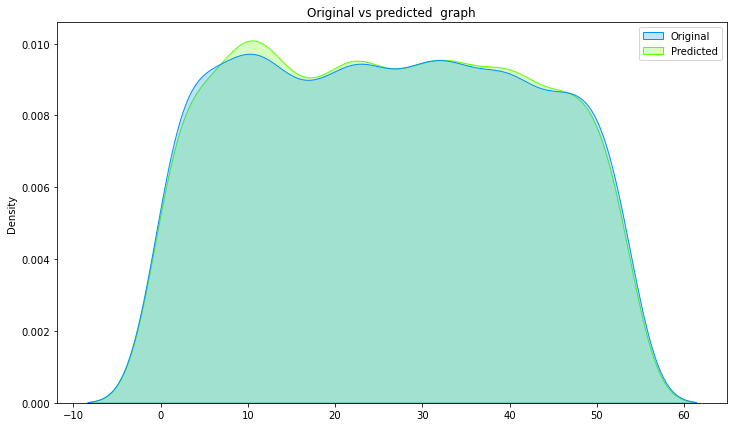

In [175]:
# Viewing the difference of prediction using Visualization 
plt.figure(figsize=(12,7))
sns.kdeplot(data=df_new, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

## Concluding Remarks for Regressor Model

* We predicted the Region outcomes of Avocados by collecting the data of 2 types of Avocados from 54 Regions using different Classification Models.
* The prediction accuracies of these models were then checked.
* Also cross-validation was performed to avoid overfitting of models.
* Because of endless time taken during hyper parameter tuning, have selected the best models without applying parameters externally.
* The prediction results indicated that Random Forest model achieved higher prediction accuracy and has given very accurate results

## (Approach 2: 'Regression Model to find Average Price)

## Data Preprocessing

##  Seperating Input and Target variables

In [50]:
x1=df_avocado.drop(columns='AveragePrice')
y1=df_avocado['AveragePrice']

In [51]:
x1.shape

(17823, 11)

In [52]:
y1.shape

(17823,)

## Data Transformation to treat Skewness

### Checking Skewness

In [55]:
x1.skew()

Total Volume    3.638205
PLU_4046        4.450558
PLU_4225        4.128335
PLU_4770        4.792655
Total Bags      4.330215
type           -0.018069
year            0.221932
region          0.012571
Total Sales     3.423213
Day             0.012347
Month           0.111072
dtype: float64

obs- keeping the acceptable range +/- 0.5, we can see skewness is present in columns 'Total Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'Total Bags','Total Sales'

Applying transformation method to treat the skewness

### Applying Transformation Method

In [56]:
x1=pd.DataFrame(x1)
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer() 
skew_col = ['Total Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'Total Bags','Total Sales']
x1[skew_col]= pt.fit_transform(x1[skew_col].values)

In [57]:
x1.skew()

Total Volume   -0.005321
PLU_4046       -0.037545
PLU_4225       -0.044071
PLU_4770        0.021688
Total Bags     -0.017007
type           -0.018069
year            0.221932
region          0.012571
Total Sales    -0.004361
Day             0.012347
Month           0.111072
dtype: float64

Obs- We can see the Skewness has gone from all those columns that contained it

### Data Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x1_scale=st.fit_transform(x1)
x1_scale=pd.DataFrame(x1_scale)

In [59]:
x1=pd.DataFrame(data=x1_scale)

## Checking Multi-Collinearity

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
def vif_cal():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x1.values,i)for i in range(x1.shape[1])]
    vif['Features']=x1.columns
    print(vif)

vif_cal()

    VIF Factor  Features
0   160.534170         0
1     7.100412         1
2    11.874763         2
3     3.931889         3
4    14.785421         4
5     3.722294         5
6     1.452324         6
7     1.085908         7
8   108.079001         8
9     1.002538         9
10    1.130398        10


* (Feature Denoted as: 0:Total Volume, 1:PLU_4046, 2:PLU_4225 , 3:PLU_4770, 4:Total Bags, 5:type, 6:year,  7: region, 8:Total Sales, 9:Day, 10:Month ) 


* Keeping the acceptable range as below or equal 10, we observe the VIF of  'Total Volume', 'PLU_4225','Total Bags', 'Total Sales' is high
* Deleting the column 'Total Sales' as it has max VIF and it infact was derived from Total Volume only.
* We will not be deleting Small Bags because Total Bags is combination of Small, Large and Xl bags, and if we delete 1, we will have to delete other 3 as well

In [62]:
x1.drop(8, axis =1, inplace=True) # Dropping 'Total Sales' column

In [63]:
x1.shape

(17823, 10)

## Data Modelling(Regression Model)

In [ ]:
### Finding Best Random State

In [64]:
#importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=.30, random_state =i)
    dtr = DecisionTreeRegressor()
    dtr.fit(x1_train, y1_train)
    pred1 = dtr.predict(x1_test)
    acc=r2_score(y1_test, pred1)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7658258192592055  on Random_state  36


### Splitting data into Train-Test

In [66]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=81)

In [67]:
x1_train.shape

(12476, 10)

In [68]:
y1_train.shape

(12476,)

In [69]:
x1_test.shape

(5347, 10)

In [70]:
y1_test.shape

(5347,)

### Using various Machine Learning Algorithms

#### 1. Linear Regression

In [71]:
lr=LinearRegression()
lr.fit(x1_train,y1_train)
lr.score(x1_train,y1_train)

0.5258465037862217

In [72]:
predlr=lr.predict(x1_test)
print("The performance metrix of Linear Regression is as below \n")
print("r2_score=",r2_score(y1_test,predlr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predlr))
print("Mean Squared Error:",mean_squared_error(y1_test,predlr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predlr)))

The performance metrix of Linear Regression is as below 

r2_score= 0.5145859032923097 

Mean Absolute Error: 0.21114292782596375
Mean Squared Error: 0.07181095583271828
Root Meand Squared Error: 0.26797566276197227


#### 2. Support Vector Regressor

In [73]:
svr=SVR()
svr.fit(x1_train,y1_train)
svr.score(x1_train,y1_train)

0.7598933922688161

In [74]:
predsvr=svr.predict(x1_test)
print("The performance metrix of Support Vector Regressor is as below \n")
print("r2_score=",r2_score(y1_test,predsvr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predsvr))
print("Mean Squared Error:",mean_squared_error(y1_test,predsvr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predsvr)))

The performance metrix of Support Vector Regressor is as below 

r2_score= 0.7313505614197132 

Mean Absolute Error: 0.14504849545453183
Mean Squared Error: 0.03974333069274438
Root Meand Squared Error: 0.1993572940545301


#### 3. Decision Tree Regressor

In [75]:
dtr=DecisionTreeRegressor()
dtr.fit(x1_train,y1_train)
dtr.score(x1_train,y1_train)

1.0

In [77]:
preddtr=dtr.predict(x1_test)
print("The performance metrix of Decision Tree Regressor is as below \n")
print("r2_score=",r2_score(y1_test,preddtr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,preddtr))
print("Mean Squared Error:",mean_squared_error(y1_test,preddtr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,preddtr)))

The performance metrix of Decision Tree Regressor is as below 

r2_score= 0.7523064783467948 

Mean Absolute Error: 0.12613802132036656
Mean Squared Error: 0.03664316439124742
Root Meand Squared Error: 0.1914240433990658


#### 4. K Neighbors Regressor

In [78]:
knr=KNeighborsRegressor()
knr.fit(x1_train,y1_train)
knr.score(x1_train,y1_train)

0.8504307421768569

In [79]:
predknr=knr.predict(x1_test)
print("The performance metrix of K Neighbors Regressor is as below \n")
print("r2_score=",r2_score(y1_test,predknr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predknr))
print("Mean Squared Error:",mean_squared_error(y1_test,predknr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predknr)))

The performance metrix of K Neighbors Regressor is as below 

r2_score= 0.7556131023499304 

Mean Absolute Error: 0.13806283897512622
Mean Squared Error: 0.036153990648962034
Root Meand Squared Error: 0.19014202757139737


#### 5.Random Forest Regressor

In [80]:
rfr=RandomForestRegressor()
rfr.fit(x1_train,y1_train)
rfr.score(x1_train,y1_train)

0.9827989924961051

In [81]:
predrfr=rfr.predict(x1_test)
print("The performance metrix of Random Forest Regressor is as below \n")
print("r2_score=",r2_score(y1_test,predrfr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predrfr))
print("Mean Squared Error:",mean_squared_error(y1_test,predrfr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predrfr)))

The performance metrix of Random Forest Regressor is as below 

r2_score= 0.8753184937505585 

Mean Absolute Error: 0.09473437441556014
Mean Squared Error: 0.018445072360201983
Root Meand Squared Error: 0.13581263696800083


#### 6.Ada Boost Regressor

In [82]:
adr=AdaBoostRegressor()
adr.fit(x1_train,y1_train)
adr.score(x1_train,y1_train)

0.5511662492347997

In [83]:
predadr=adr.predict(x1_test)
print("The performance metrix of Ada Boost Regressor is as below \n")
print("r2_score=",r2_score(y1_test,predadr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predadr))
print("Mean Squared Error:",mean_squared_error(y1_test,predadr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predadr)))

The performance metrix of Ada Boost Regressor is as below 

r2_score= 0.5312668477703993 

Mean Absolute Error: 0.21306952175172833
Mean Squared Error: 0.06934321833747725
Root Meand Squared Error: 0.2633310052718389


#### 7.Gradient Boosting Regressor

In [84]:
gbr=GradientBoostingRegressor()
gbr.fit(x1_train,y1_train)
gbr.score(x1_train,y1_train)

0.7429937275167906

In [85]:
predgbr=gbr.predict(x1_test)
print("The performance metrix of Gradient Boosting Regressor is as below \n")
print("r2_score=",r2_score(y1_test,predgbr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predgbr))
print("Mean Squared Error:",mean_squared_error(y1_test,predgbr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predgbr)))

The performance metrix of Gradient Boosting Regressor is as below 

r2_score= 0.7262140679503868 

Mean Absolute Error: 0.1528308690483371
Mean Squared Error: 0.04050321077896892
Root Meand Squared Error: 0.20125409506136496


### Regularization to overcome Over-Fitting (Lasso,Ridge)

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

#### 8. Lasso Regression

In [87]:
ls=Lasso(alpha=0.1)
ls.fit(x1_train,y1_train)
ls.score(x1_train,y1_train)

0.337219546805719

In [88]:
predls=ls.predict(x1_test)
print("The performance metrix of Lasso Regressor is as below \n")
print("r2_score=",r2_score(y1_test,predls),"\n")
print("Mean Absolute Error:",mean_absolute_error(y1_test,predls))
print("Mean Squared Error:",mean_squared_error(y1_test,predls))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predls)))

The performance metrix of Lasso Regressor is as below 

r2_score= 0.33109354101765853 

Mean Absolute Error: 0.25026859415018615
Mean Squared Error: 0.09895636016340664
Root Meand Squared Error: 0.3145732985544174


#### 9. Ridge Regression

In [89]:
rg=Ridge(alpha=0.1)
rg.fit(x1_train,y1_train)
rg.score(x1_train,y1_train)

0.5258465018371776

In [90]:
predrg=rg.predict(x1_test)
print("The performance metrix of Ridge Regressor is as below \n")
print("r2_score=",r2_score(y1_test,predrg),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predrg))
print("Mean Squared Error:",mean_squared_error(y1_test,predrg))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predrg)))

The performance metrix of Ridge Regressor is as below 

r2_score= 0.5145873570479478 

Mean Absolute Error: 0.21114253311038192
Mean Squared Error: 0.07181074076771991
Root Meand Squared Error: 0.267975261484563


## Cross Validation

In [98]:
from sklearn.model_selection import cross_val_score

# cv score for Linear Regression 
cvlr=cross_val_score(lr,x1,y1,cv=5).mean()
print('CV score  for Linear rgerssion:',cvlr)
print("And Difference between CV and r2_score =", r2_score(y1_test,predlr)-cvlr)

CV score  for Linear rgerssion: 0.1725091770638025
And Difference between CV and r2_score = 0.34207672622850716


In [99]:
# cv score for Support Vector Regressor
cvsvr=cross_val_score(svr,x1,y1,cv=5).mean()
print('CV score  for Support Vector Regressor:',cvsvr)
print("And Difference between CV and r2_score =", r2_score(y1_test,predsvr)-cvsvr)

CV score  for Support Vector Regressor: -0.0773066175764042
And Difference between CV and r2_score = 0.8086571789961174


In [100]:
# cv score for Decision Tree Regressor
cvdtr=cross_val_score(dtr,x1,y1,cv=5).mean()
print('CV score  for Decision Tree Regressor:',cvdtr)
print("And Difference between CV and r2_score =", r2_score(y1_test,preddtr)-cvdtr)

CV score  for Decision Tree Regressor: -0.35047157532202894
And Difference between CV and r2_score = 1.1027780536688236


In [101]:
# cv score for K Neighbors Regressor
cvknr=cross_val_score(knr,x1,y1,cv=5).mean()
print('CV score  for K Neighbors Regressor:',cvknr)
print("And Difference between CV and r2_score =", r2_score(y1_test,predknr)-cvknr)

CV score  for K Neighbors Regressor: 0.057376369474782266
And Difference between CV and r2_score = 0.6982367328751481


In [102]:
# cv score for Random Forest Regressor
cvrfr=cross_val_score(rfr,x1,y1,cv=5).mean()
print('CV score  for Random Forest Regressor:',cvrfr)
print("And Difference between CV and r2_score =", r2_score(y1_test,predrfr)-cvrfr)

CV score  for Random Forest Regressor: 0.14297215872478883
And Difference between CV and r2_score = 0.7323463350257696


In [103]:
# cv score for Ada Boost Regressor
cvadr=cross_val_score(adr,x1,y1,cv=5).mean()
print('CV score  for Ada Boost Regressor:',cvadr)
print("And Difference between CV and r2_score =", r2_score(y1_test,predadr)-cvadr)

CV score  for Ada Boost Regressor: -0.08880489099760151
And Difference between CV and r2_score = 0.6200717387680008


In [105]:
# cv score for Gradient Boosting Regressor
cvgbr=cross_val_score(gbr,x1,y1,cv=5).mean()
print('CV score  for Gradient Boosting Regressor:',cvgbr)
print("And Difference between CV and r2_score =", r2_score(y1_test,predgbr)-cvgbr)

CV score  for Gradient Boosting Regressor: 0.35444804304340305
And Difference between CV and r2_score = 0.37176602490698374


In [106]:
# cv score for Lasso Regressor
cvls=cross_val_score(ls,x1,y1,cv=5).mean()
print('CV score  for Lasso Regressor:',cvls)
print("And Difference between CV and r2_score =", r2_score(y1_test,predls)-cvls)

CV score  for Lasso Regressor: -0.36073795620092997
And Difference between CV and r2_score = 0.6918314972185885


In [107]:
# cv score for Ridge Regressor
cvrg=cross_val_score(rg,x1,y1,cv=5).mean()
print('CV score  for Ridge Regressor:',cvrg)
print("And Difference between CV and r2_score =", r2_score(y1_test,predrg)-cvrg)

CV score  for Ridge Regressor: 0.17251058622135512
And Difference between CV and r2_score = 0.34207677082659266


Obs- 
* Unfortunately, all the models are giving very high overfitting, and thus we can say all the machine learning algorithms are not much suitable for this dataset in calculating Average Price.
* The difference between r2_score and cv score is least in Linear Regression and Gradient Boosting Regressor, but we are selecting 'Gradient Boosting Regressor' as best  model as it has given better CV sscore.


## Hyper Parameter Tuning

In [108]:
gbr.get_params() # Getting Gradient Boosting Regressor Parameters

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [111]:
#Selecting few parameter list to pass in Gradient Boosting Regressor
from sklearn.model_selection import GridSearchCV
# defining parameter range
parameter = {'alpha':[0,0.1,0.9,1.0], 
             'criterion':['friedman_mse','squared_error'],
             'learning_rate':[0.1,1,10],
             'max_depth':[2,3,4]}

In [113]:
# Start Tuning 
gbr1=GradientBoostingRegressor()
GCV = GridSearchCV(gbr1,parameter,cv=5)

GCV.fit(x1_train,y1_train)  
print(GCV.best_params_)         #printing the best parameter found by Gridsearchcv

{'alpha': 0.1, 'criterion': 'squared_error', 'learning_rate': 1, 'max_depth': 3}


In [114]:
#Applying best parameter values on Gradient Boosting Regressor Algorithm 
avg_price_best=GradientBoostingRegressor(alpha=0.1, criterion='squared_error', learning_rate=1, max_depth=3)
avg_price_best.fit(x1_train,y1_train)
avg_price_best.score(x1_train,y1_train)

0.8754272357203507

In [115]:
predgbr1=avg_price_best.predict(x1_test)
print("r2_score=",r2_score(y1_test,predgbr1),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predgbr1))
print("Mean Squared Error:",mean_squared_error(y1_test,predgbr1))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predgbr1)))

r2_score= 0.8093126466962445 

Mean Absolute Error: 0.12572321253162838
Mean Squared Error: 0.02820981343316846
Root Meand Squared Error: 0.16795777276794444


Obs- Our best model for Average Price detection has given r2_score= 0.8093126466962445  and Mean Absolute Error= 0.12572321253162838

## Saving the best Regressor model

In [116]:
import joblib

joblib.dump(avg_price_best,'avocado_price.obj')

['avocado_price.obj']

In [117]:
avg_price_model=joblib.load('avocado_price.obj')

In [118]:
# Viewing Attributes of the best model
avg_price_model

GradientBoostingRegressor(alpha=0.1, criterion='squared_error', learning_rate=1)

## Prediction

In [119]:
ori1 = np.array(y1_test)
predicted1 = np.array(avg_price_model.predict(x1_test))
df_new1 = pd.DataFrame({"Original":ori1,"Predicted":predicted1},index= range(len(ori1)))
df_new1

,Original,Predicted
0,1.91,1.912794
1,1.13,1.105473
2,1.15,1.212860
3,1.12,1.203235
4,2.09,2.097512
...,...,...
5342,1.35,1.105815
5343,1.14,1.466362
5344,1.46,1.300519
5345,1.35,1.218412


Obs- We can see our best model has yielded fairly same results(if not exact)

Text(0.5, 1.0, 'Original vs predicted  graph')

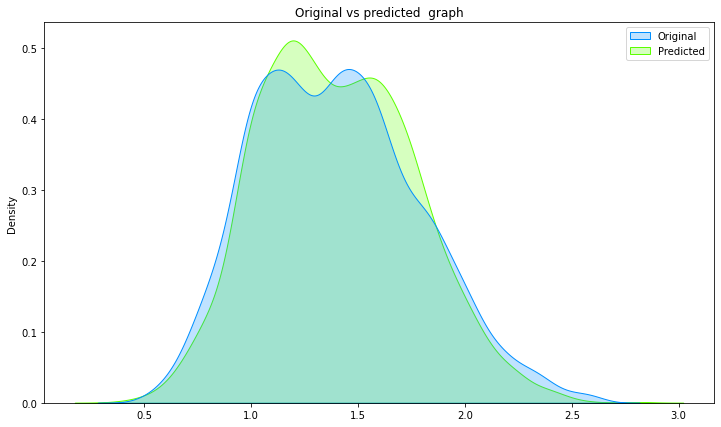

In [120]:
# Viewing the difference of prediction using Visualization 
plt.figure(figsize=(12,7))
sns.kdeplot(data=df_new1, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

## Concluding Remarks for Regression Model

* We predicted the avg_price outcomes of Avocados by collecting the data of 2 types of Avocados from 54 Regions using different Regression Models.
* The prediction accuracies of these models were then checked.
* Also cross-validation was performed to avoid overfitting of models.
* The prediction results indicated that Gradient Regressor model achieved higher prediction accuracy and has given fairly accurate results